Data Collection and Preprocessing

In [2]:
import pandas as pd
import numpy as np
import re
import gensim
from gensim import corpora   #to make dictionary
import nltk
nltk.download('wordnet')
from nltk.tokenize import word_tokenize  #to convert string to words
from nltk.corpus import stopwords  #to remove stopwords
from nltk.stem import WordNetLemmatizer #to lemmatize words
from sklearn.feature_extraction.text import TfidfVectorizer #to convert text to vector
from sklearn.preprocessing import LabelEncoder #to convert categories to numeric values
from sklearn.feature_extraction.text import CountVectorizer #to convert text to vectors
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split #to divide the data into training and testing sets
from sklearn.preprocessing import StandardScaler #to fit values into model
from wordcloud import WordCloud

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\anupa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
df=pd.read_csv("Imdb - data_imdb.csv")
df.head()

review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [5]:
df.describe()

review sentiment
count                                               50000     50000
unique                                              49581         2
top     Loved today's show!!! It was a variety and not...  positive
freq                                                    5     25000

In [6]:
print(df.isnull().sum())

review       0
sentiment    0
dtype: int64


In [7]:
print("Duplicate rows:", df.duplicated().sum())
df.drop_duplicates(inplace=True)

Duplicate rows: 419


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49581 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     49581 non-null  object
 1   sentiment  49581 non-null  object
dtypes: object(2)
memory usage: 1.1+ MB


In [9]:
# to check balanced or imbalanced data
df['sentiment'].value_counts()

sentiment
positive    24884
negative    24697
Name: count, dtype: int64

In [10]:
#analyzing the length of reviews
df['review_char_len'] = df['review'].apply(len)
df['review_word_len'] = df['review'].apply(lambda x: len(str(x).split()))


In [11]:
print(df[['review_char_len', 'review_word_len']].describe())

       review_char_len  review_word_len
count     49581.000000     49581.000000
mean       1310.530707       231.344366
std         990.786752       171.546644
min           7.000000         1.000000
25%         699.000000       126.000000
50%         971.000000       173.000000
75%        1592.000000       281.000000
max       13704.000000      2470.000000


In [12]:
def preprocess_text(text):
    # 1. Remove punctuation and special characters
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)

    # 2. Tokenize
    tokens = word_tokenize(text.lower())

    # 3. Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # 4. Lemmatize
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return lemmatized_tokens

In [13]:
df["review"] = df["review"].apply(preprocess_text)
df.head()

review sentiment  \
0  [one, reviewer, mentioned, watching, 1, oz, ep...  positive   
1  [wonderful, little, production, br, br, filmin...  positive   
2  [thought, wonderful, way, spend, time, hot, su...  positive   
3  [basically, there, family, little, boy, jake, ...  negative   
4  [petter, matteis, love, time, money, visually,...  positive   

   review_char_len  review_word_len  
0             1761              307  
1              998              162  
2              926              166  
3              748              138  
4             1317              230

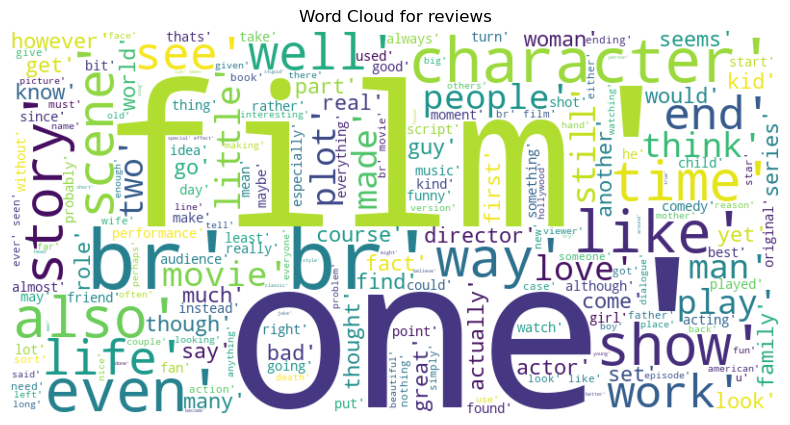

In [14]:
text = " ".join(map(str,df['review'].tolist()))

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud for reviews")
plt.show()

In [15]:
#vectorization using BoW to apply the naive bayes model
vectorizer=CountVectorizer()
df['review'] = df['review'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)
bow = CountVectorizer(max_features=5000, stop_words='english')
X_bow = bow.fit_transform(df['review'])

In [16]:
print("Feature Names:")
print(bow.get_feature_names_out())

Feature Names:
['10' '100' '1000' ... 'zero' 'zombie' 'zone']


In [17]:
print(X_bow.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [18]:
#Vectorization using TF-IDF
tfidf = TfidfVectorizer() 
x_tfidf = tfidf.fit_transform(df['review'])

In [19]:
print(x_tfidf[:5].toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [20]:
print(tfidf.get_feature_names_out())

['00' '000' '0000000000001' ... 'zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz'
 'zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz'
 'zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz']


In [21]:
le = LabelEncoder()
df['sentiment'] = le.fit_transform(df['sentiment'])
df['review']=le.fit_transform(df['review'])

In [22]:
df.head()

review  sentiment  review_char_len  review_word_len
0   31159          1             1761              307
1   47990          1              998              162
2   43430          1              926              166
3    3424          0              748              138
4   32446          1             1317              230

In [23]:
df['avg_word_len'] = df['review_char_len'] / df['review_word_len']

In [24]:
df.head()

review  sentiment  review_char_len  review_word_len  avg_word_len
0   31159          1             1761              307      5.736156
1   47990          1              998              162      6.160494
2   43430          1              926              166      5.578313
3    3424          0              748              138      5.420290
4   32446          1             1317              230      5.726087

Build and train classification models to predict the sentiment of reviews.

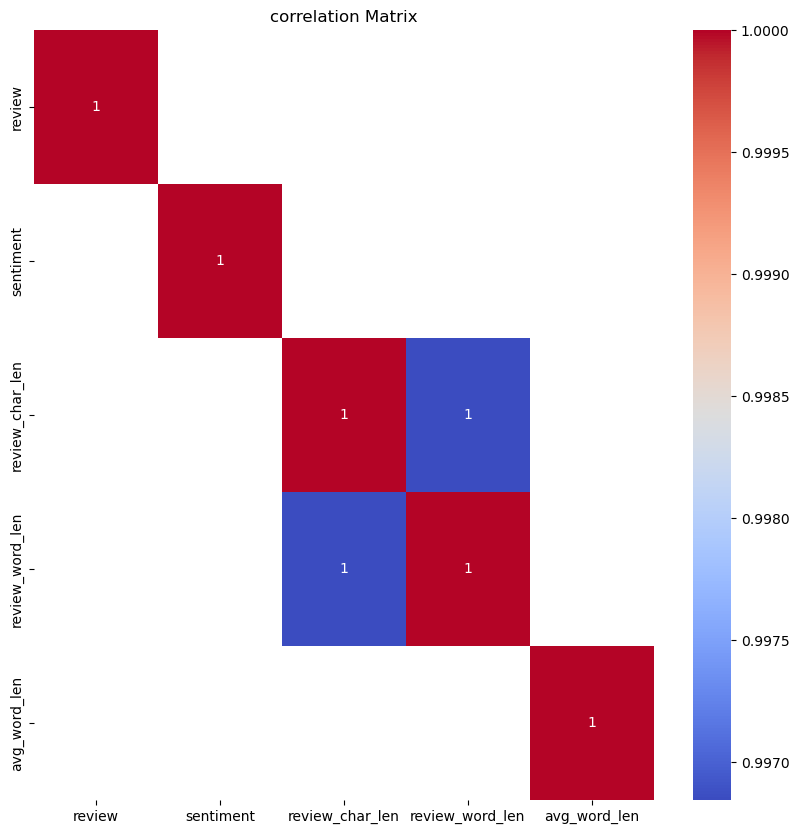

In [26]:
correlation_matrix=df.corr()
high_correlation = correlation_matrix[(correlation_matrix > 0.85) | (correlation_matrix < -0.85)]  # Only strong correlations

plt.figure(figsize=(10,10))
sns.heatmap(high_correlation,annot=True,cmap='coolwarm')
plt.title('correlation Matrix')
plt.show()

In [27]:
x_tfidf=df.drop(["sentiment","review_char_len","review_word_len","avg_word_len"], axis=1)
y=df["sentiment"]
print(x_tfidf.shape)
print(y.shape)

(49581, 1)
(49581,)


In [28]:
x_train,x_test,y_train,y_test = train_test_split(x_tfidf,y,test_size=0.25, random_state=42)

In [29]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(37185, 1)
(12396, 1)
(37185,)
(12396,)


In [30]:
scaler = StandardScaler()

X_train = scaler.fit_transform(x_train)  
X_test = scaler.transform(x_test)

Experiment with various classification algorithms such as Logistic Regression,
Naive Bayes, Support Vector Machine (SVM), Random Forest, and Neural
Networks (e.g., LSTM, BERT, etc.).

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [33]:
model1_lr = LogisticRegression()
model1_lr.fit(X_train, y_train)
y_pred_lr = model1_lr.predict(X_test)
print("Logistic Regression:\n", classification_report(y_test, y_pred_lr))

Logistic Regression:
               precision    recall  f1-score   support

           0       0.51      0.43      0.47      6219
           1       0.51      0.58      0.54      6177

    accuracy                           0.51     12396
   macro avg       0.51      0.51      0.51     12396
weighted avg       0.51      0.51      0.51     12396



In [49]:
#doing the splitting again with different variable names because Naive Bayes cannot handle negative values

x_train2, x_test2, y_train2, y_test2 = train_test_split(X_bow, y, test_size=0.2, random_state=42)
scaler = StandardScaler(with_mean=False)

X_train2 = scaler.fit_transform(x_train2)  
X_test2 = scaler.transform(x_test2)

model2_nb = MultinomialNB()
model2_nb.fit(X_train2, y_train2)
y_pred_nb = model2_nb.predict(X_test2)

print("Naive Bayes:\n", classification_report(y_test2, y_pred_nb))

Naive Bayes:
               precision    recall  f1-score   support

           0       0.83      0.85      0.84      4995
           1       0.84      0.83      0.84      4922

    accuracy                           0.84      9917
   macro avg       0.84      0.84      0.84      9917
weighted avg       0.84      0.84      0.84      9917



In [35]:
model3_svm = LinearSVC()
model3_svm.fit(X_train, y_train)
y_pred_svm = model3_svm.predict(X_test)

print("SVM:\n", classification_report(y_test, y_pred_svm))

SVM:
               precision    recall  f1-score   support

           0       0.51      0.43      0.47      6219
           1       0.51      0.58      0.54      6177

    accuracy                           0.51     12396
   macro avg       0.51      0.51      0.51     12396
weighted avg       0.51      0.51      0.51     12396



In [36]:
model4_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model4_rf.fit(X_train, y_train)
y_pred_rf = model4_rf.predict(X_test)

print("Random Forest:\n", classification_report(y_test, y_pred_rf))

Random Forest:
               precision    recall  f1-score   support

           0       0.58      0.57      0.58      6219
           1       0.58      0.59      0.58      6177

    accuracy                           0.58     12396
   macro avg       0.58      0.58      0.58     12396
weighted avg       0.58      0.58      0.58     12396



Evaluate the model’s performance using appropriate metrics.

In [38]:
a1 = accuracy_score(y_test, y_pred_lr)
print("Accuracy of logistic regresssion model:", a1)
a2 = accuracy_score(y_test2, y_pred_nb)
print("Accuracy of Naive Bayes model:", a2)
a3 = accuracy_score(y_test, y_pred_svm)
print("Accuracy of support vector machine model:", a3)
a4 = accuracy_score(y_test, y_pred_rf)
print("Accuracy of random forest classifier model:", a4)

Accuracy of logistic regresssion model: 0.5087931590835754
Accuracy of Naive Bayes model: 0.8445094282545125
Accuracy of support vector machine model: 0.5088738302678283
Accuracy of random forest classifier model: 0.579380445304937


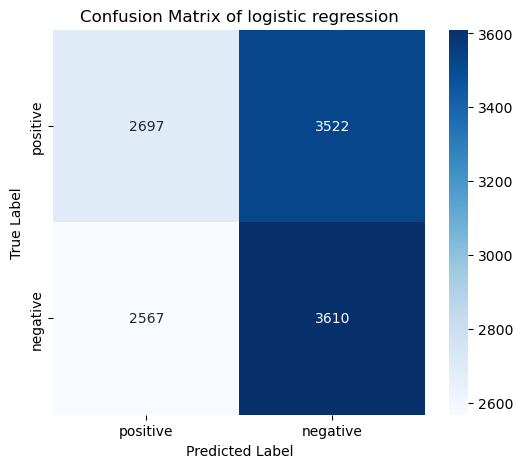

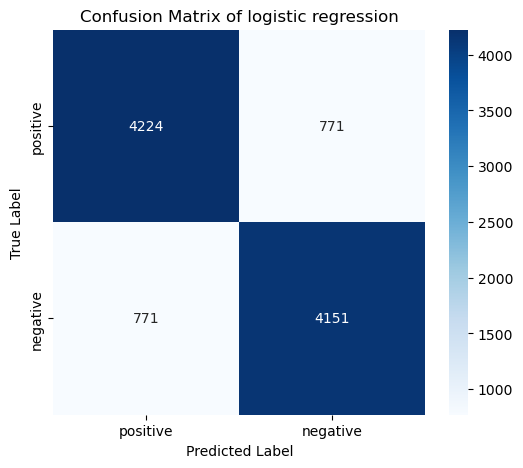

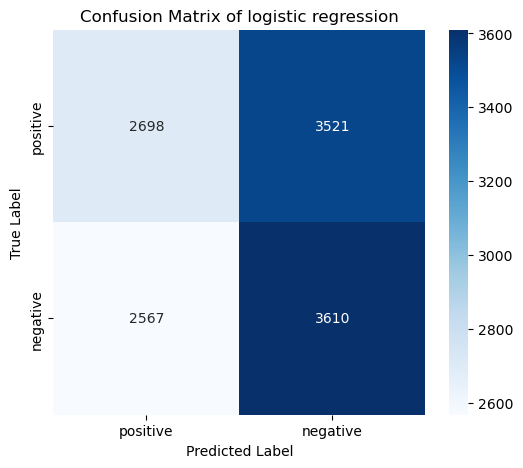

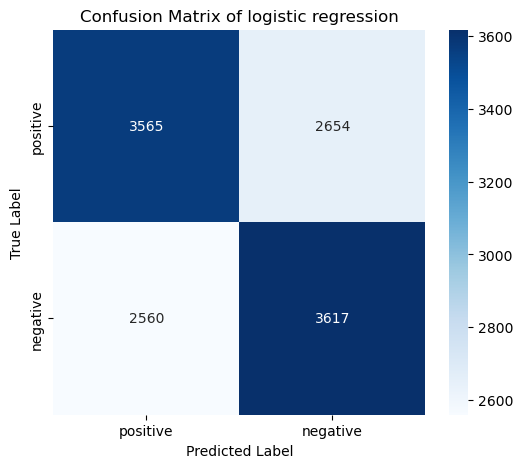

In [39]:
cm1 = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(6,5))
sns.heatmap(cm1, annot=True, fmt="d", cmap="Blues", xticklabels=['positive', 'negative'], yticklabels=['positive', 'negative'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of logistic regression')
plt.show()

cm2 = confusion_matrix(y_test2, y_pred_nb)
plt.figure(figsize=(6,5))
sns.heatmap(cm2, annot=True, fmt="d", cmap="Blues", xticklabels=['positive', 'negative'], yticklabels=['positive', 'negative'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of logistic regression')
plt.show()

cm3 = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(6,5))
sns.heatmap(cm3, annot=True, fmt="d", cmap="Blues", xticklabels=['positive', 'negative'], yticklabels=['positive', 'negative'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of logistic regression')
plt.show()

cm4 = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6,5))
sns.heatmap(cm4, annot=True, fmt="d", cmap="Blues", xticklabels=['positive', 'negative'], yticklabels=['positive', 'negative'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of logistic regression')
plt.show()



Interpretation: 
1. Naive Bayes significantly outperformed all other models, achieving an accuracy of 0.8445, indicating a strong predictive performance on the given dataset.

2. Logistic Regression and SVM both had similar and relatively low accuracies (~0.51), suggesting that linear models may not capture the complexity of the dataset well.

3. The Random Forest Classifier showed moderate improvement over Logistic Regression and SVM with an accuracy of 0.5794, but it still lagged behind Naive Bayes.

Conclusion:
1. Naive Bayes is the most suitable model for this classification task and is recommended for deployment or further optimization.

2. Simpler linear models may not capture the underlying patterns in the data.

3. Tree-based models like Random Forest performed better but require further tuning to match the performance of Naive Bayes.

Future recommendations: 
1. Explore hyperparameter tuning for all models.

2. Introduce additional features or perform feature selection.

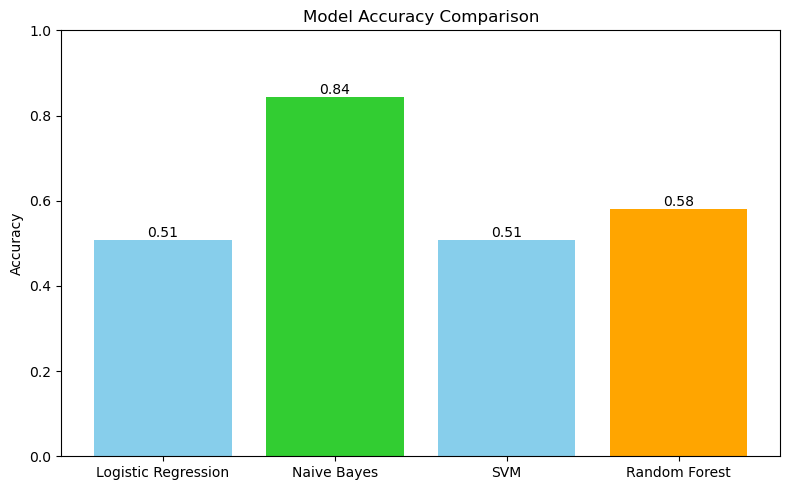

In [43]:

models = ['Logistic Regression', 'Naive Bayes', 'SVM', 'Random Forest']
accuracies = [0.5088, 0.8445, 0.5089, 0.5794]

plt.figure(figsize=(8, 5))
bars = plt.bar(models, accuracies, color=['skyblue', 'limegreen', 'skyblue', 'orange'])
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.bar_label(bars, fmt='%.2f')
plt.tight_layout()
plt.show()

Video link: 
https://drive.google.com/file/d/11TxHiWHP1ulU0P0VrmeI_bHEi0BUahng/view?usp=sharing 